In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR

In [2]:
mobile = pd.read_csv('./Mobile.csv', index_col=0)
census = pd.read_csv('./Census.csv', index_col=0)
vehicles = pd.read_csv('./Vehicles.csv', index_col=0)
pedestrians = pd.read_csv('./Pedestrians.csv', index_col=0)

mp = pd.read_csv('./Mobile_Pickup.csv',  index_col=0)
vp = pd.read_csv('./Vehicles_Pickup.csv',  index_col=0)
cp = pd.read_csv('./Census_Pickup.csv',  index_col=0)
pp = pd.read_csv('./Pedestrians_Pickup.csv',  index_col=0)

In [3]:
X = cp
Y = vp

# 出力ファイルの名前

In [4]:
output_name = './Output/outpu.csv'

# reshapeする時に変形する形(行3, 列4)

In [5]:
shape_array = (3, 4)

In [6]:
X

,720,1080,1440,1800
Area,,,,
12,1.0,1.5,1.2,2.0
17,3.0,2.0,4.1,3.4
18,2.6,2.5,2.7,3.5


In [7]:
Y

,720,1080,1440,1800
Area,,,,
12,2.7,3.1,3.9,4.1
17,7.4,7.0,9.5,8.5
18,5.1,4.4,6.0,6.7


In [8]:
model = LR()

In [9]:
X = X.values.reshape(-1, 1)

In [10]:
Y = Y.values.reshape(-1, 1)

In [11]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# 傾き

In [12]:
model.coef_

array([[1.98628892]])

# 切片

In [13]:
model.intercept_

array([0.81703973])

# 相関関係

In [14]:
model.score(X, Y)

0.7720176499653368

# 散布図を表示

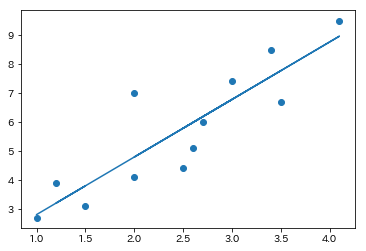

In [15]:
plt.scatter(X, Y)
pred = model.predict(X)
plt.plot(X, pred)

In [16]:
pred

array([[2.80332865],
       [3.79647311],
       [3.20058644],
       [4.78961758],
       [6.7759065 ],
       [4.78961758],
       [8.96082432],
       [7.57042207],
       [5.98139093],
       [5.78276204],
       [6.18001982],
       [7.76905096]])

# `numpy.ndarray`型なのでreshapeで二次元に変換

In [17]:
pred = pred.reshape(shape_array)

In [18]:
output = pd.DataFrame(pred)
output

,0,1,2,3
0,2.803329,3.796473,3.200586,4.789618
1,6.775907,4.789618,8.960824,7.570422
2,5.981391,5.782762,6.180020,7.769051


# `numpy.ndarray`型なのでreshapeで二次元に変換  

In [19]:
Y = Y.reshape(shape_array)

# 目的変数と予測データの差分

In [20]:
Y - output

,0,1,2,3
0,-0.103329,-0.696473,0.699414,-0.689618
1,0.624093,2.210382,0.539176,0.929578
2,-0.881391,-1.382762,-0.180020,-1.069051


# 目的変数と予測データの二乗誤差

In [21]:
np.power(Y - output, 2)

,0,1,2,3
0,0.010677,0.485075,0.489179,0.475572
1,0.389493,4.885790,0.290710,0.864115
2,0.776850,1.912031,0.032407,1.142870
